Random Forest Accuracy: 0.98

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        30
           1       1.00      0.97      0.98        30

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60



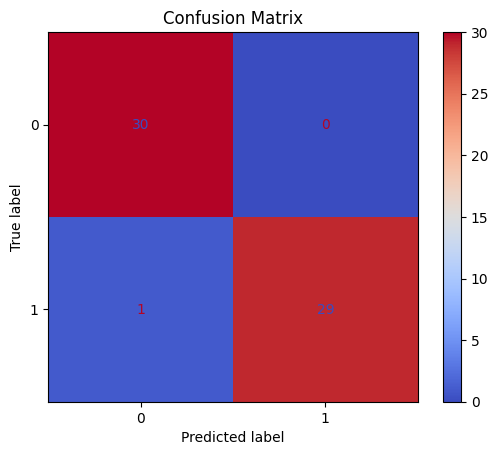

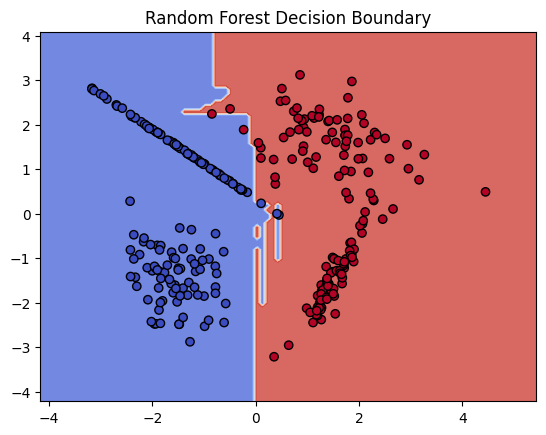

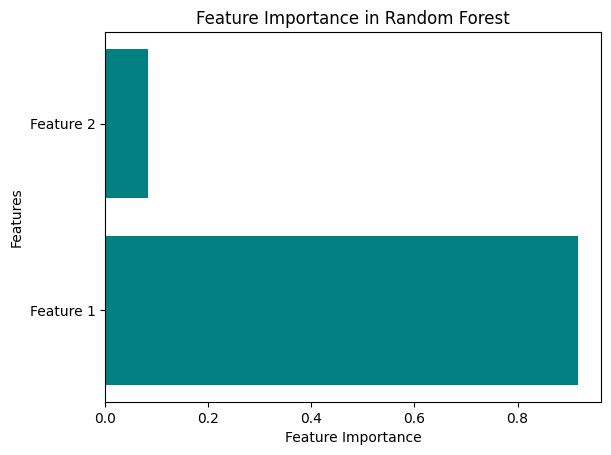

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay


X, y = make_classification(
    n_samples=300,
    n_features=2,
    n_classes=2,
    n_informative=2,
    n_redundant=0,
    random_state=42,
    class_sep=1.5
)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


forest = RandomForestClassifier(
    n_estimators=100,  
    max_depth=5,       
    random_state=42
)
forest.fit(X_train, y_train)


y_pred = forest.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


disp = ConfusionMatrixDisplay.from_estimator(forest, X_test, y_test, cmap='coolwarm')
disp.ax_.set_title("Confusion Matrix")
plt.show()


def plot_decision_boundary(X, y, model, title="Decision Boundary"):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap='coolwarm')
    plt.title(title)
    plt.show()

plot_decision_boundary(X, y, forest, title="Random Forest Decision Boundary")


importances = forest.feature_importances_
feature_names = ["Feature 1", "Feature 2"]

plt.barh(feature_names, importances, color='teal')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in Random Forest")
plt.show()
